<a href="https://colab.research.google.com/github/dgalassi99/quant-trading-self-study/blob/main/01_foundations/W2_Moving_Average_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a MAs Crossing Strategy

We select different securities from stocks, to crypto and commodities

In [1]:
#importing main libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [39]:
#let's download data for the desired securities
tickers = ['GOOGL', 'NVDA', 'QQQ', 'VTI', 'ETH-USD', 'GLD', 'USO']
start_date = '2020-01-01'
end_date = '2025-01-01'
#create a dictionary where key = ticker name and value is ticker data for each tick in tickers
data = {}
for tik in tickers:
  data[tik] = yf.download(tik, start=start_date, end=end_date)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [40]:
#fast checking if there are missing values
for tik in tickers:
  print(data[tik].isna().sum())


Price   Ticker
Close   GOOGL     0
High    GOOGL     0
Low     GOOGL     0
Open    GOOGL     0
Volume  GOOGL     0
dtype: int64
Price   Ticker
Close   NVDA      0
High    NVDA      0
Low     NVDA      0
Open    NVDA      0
Volume  NVDA      0
dtype: int64
Price   Ticker
Close   QQQ       0
High    QQQ       0
Low     QQQ       0
Open    QQQ       0
Volume  QQQ       0
dtype: int64
Price   Ticker
Close   VTI       0
High    VTI       0
Low     VTI       0
Open    VTI       0
Volume  VTI       0
dtype: int64
Price   Ticker 
Close   ETH-USD    0
High    ETH-USD    0
Low     ETH-USD    0
Open    ETH-USD    0
Volume  ETH-USD    0
dtype: int64
Price   Ticker
Close   GLD       0
High    GLD       0
Low     GLD       0
Open    GLD       0
Volume  GLD       0
dtype: int64
Price   Ticker
Close   USO       0
High    USO       0
Low     USO       0
Open    USO       0
Volume  USO       0
dtype: int64


In [56]:
#now we will select just a ticker here but you can change it to see how
#this simple strategy applies to different commodities
tik = 'QQQ'
#we will just keep close and volume as we assume the strategy is not on the short time frame
#hence we will not 'trade intraday
df = data[tik][['Close', 'Volume']]
#dropping the outer level of the columns to avoid having a multiindex dataset
df = df.droplevel(level=1, axis=1)

In [57]:
#calculate 50,200 period MAs
df['ma20'] = df['Close'].rolling(20).mean()
df['ma50'] = df['Close'].rolling(50).mean()
#dropping the NaN rows created by the rolling function
df = df.dropna()

In [58]:
df.head()

Price,Close,Volume,ma20,ma50
Date,,,,
2020-03-13,186.259003,134882000,206.380550,212.122200
2020-03-16,163.947388,92054400,203.216838,211.214630
2020-03-17,176.381439,121257100,200.670468,210.594089
2020-03-18,171.016602,114156300,197.746915,209.839523
2020-03-19,172.043137,120896500,194.981212,209.106069


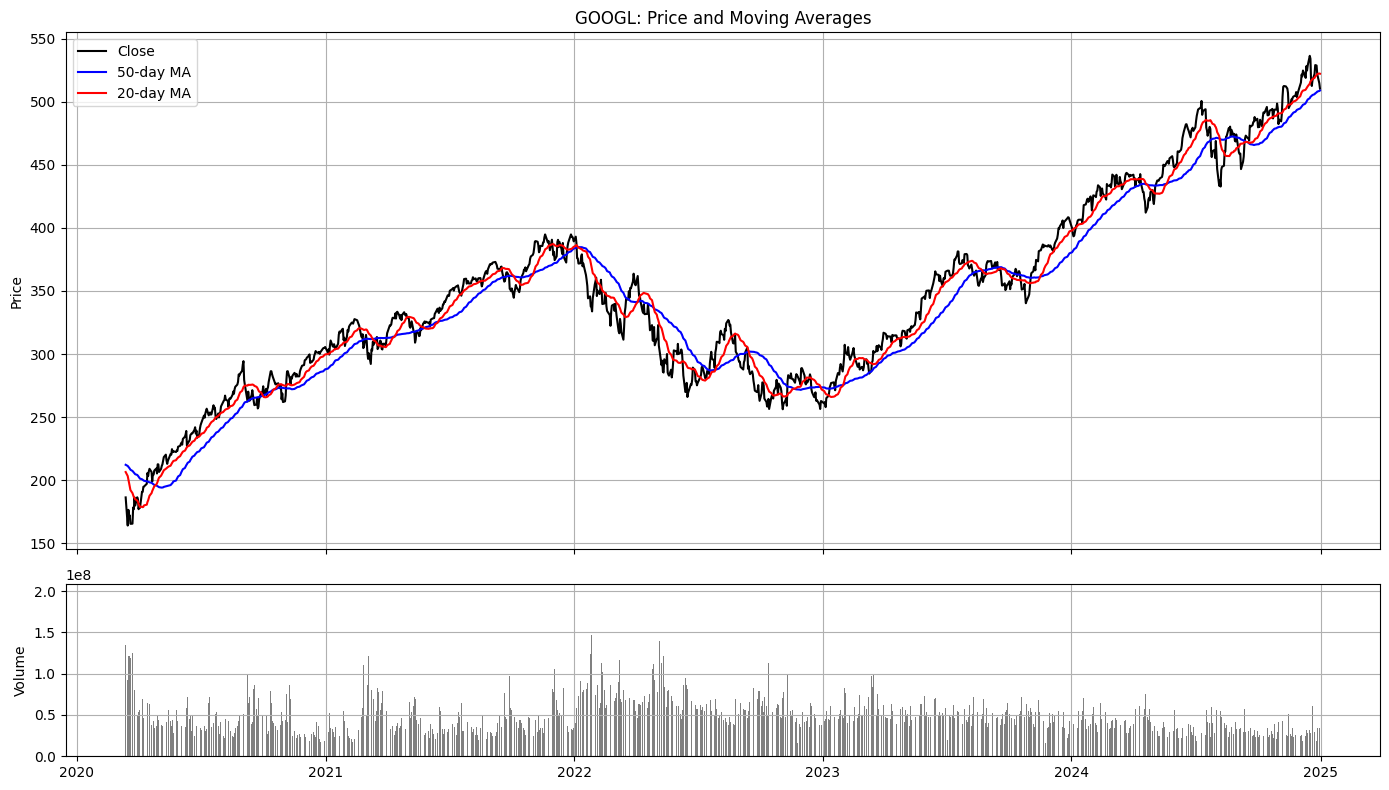

In [47]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8),
    gridspec_kw={'height_ratios': [3, 1]},sharex=True)
# --- Main price chart
ax1.plot(df['Close'], label='Close', color='black')
ax1.plot(df['ma50'], label='50-day MA', color='blue')
ax1.plot(df['ma20'], label='20-day MA', color='red')
ax1.set_title('GOOGL: Price and Moving Averages')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True)
# --- Volume chart
ax2.bar(df.index, df['Volume'], color='gray')
ax2.set_ylabel('Volume')
ax2.grid(True)
# --- adjusting the plot
plt.tight_layout()
plt.show()

In [61]:
#first trading simple strategy

#long when the short frame MA breaks the long frame one
#short when the break occurs in the opposite direction

#initialize the signal column with zeros
df['signal'] = 0
#set signal to 1 when 20ma > 50ma
df['signal'][df['ma20'] > df['ma50']] = 1
#set signal to -1 when 20ma < 50ma
df['signal'][df['ma20'] < df['ma50']] = -1
#now we need to detect crossovers so we need to take the difference
df['cross'] = df['signal'].diff()

<ipython-input-61-51645a2b20e8>:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['signal'][df['ma20'] > df['ma50']] = 1
<ipython-input-61-51645a2b20e8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [62]:
df[df['signal'] == 1]

Price,Close,Volume,ma20,ma50,signal,cross
Date,,,,,,
2020-04-27,209.189743,36451700,196.506926,195.861233,1,2.0
2020-04-28,205.249664,46862800,197.451170,195.421794,1,0.0
2020-04-29,212.528046,48716400,198.838911,195.126178,1,0.0
2020-04-30,212.440720,43359500,200.614830,194.785239,1,0.0
2020-05-01,206.453079,48795000,201.911835,194.367157,1,0.0
...,...,...,...,...,...,...
2024-12-24,529.170898,17558200,520.173627,506.698455,1,0.0
2024-12-26,528.811401,19090500,521.227553,507.488082,1,0.0
2024-12-27,521.781860,33839600,522.129881,508.135922,1,0.0
